# Load data


In [1]:
import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt


# to play the audio files
from IPython.display import Audio


import tensorflow as tf 
from tqdm import tqdm

2025-03-08 03:34:34.426087: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741404876.409394   15341 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741404876.955945   15341 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-08 03:34:42.050595: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
from pathlib import Path

Ravdess = Path(r'/data/RAVDESS_Data')

ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:

    actor = os.listdir(Ravdess / dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')

        file_emotion.append(int(part[2]))
        file_path.append((Ravdess / dir / file))  
        

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

Ravdess_df.Emotions.replace({
    1: 'Neutral', 2: 'Calm', 3: 'Happy', 4: 'Sad', 5: 'Angry', 6: 'Fear', 7: 'Disgust', 8: 'Surprise'
}, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: '/data/RAVDESS_Data'

In [7]:
Ravdess_df

Emotions                                               Path
0      Neutral  /mnt/d/1203_ISEmotalk/data/RAVDESS_Data/Actor_...
1      Neutral  /mnt/d/1203_ISEmotalk/data/RAVDESS_Data/Actor_...
2      Neutral  /mnt/d/1203_ISEmotalk/data/RAVDESS_Data/Actor_...
3      Neutral  /mnt/d/1203_ISEmotalk/data/RAVDESS_Data/Actor_...
4         Calm  /mnt/d/1203_ISEmotalk/data/RAVDESS_Data/Actor_...
...        ...                                                ...
1435  Surprise  /mnt/d/1203_ISEmotalk/data/RAVDESS_Data/Actor_...
1436  Surprise  /mnt/d/1203_ISEmotalk/data/RAVDESS_Data/Actor_...
1437  Surprise  /mnt/d/1203_ISEmotalk/data/RAVDESS_Data/Actor_...
1438  Surprise  /mnt/d/1203_ISEmotalk/data/RAVDESS_Data/Actor_...
1439  Surprise  /mnt/d/1203_ISEmotalk/data/RAVDESS_Data/Actor_...

[1440 rows x 2 columns]

In [ ]:
# ---- Tính toán thang màu chung ---- #
all_mel_values = []  

for path in Ravdess_df.Path:
    data, sr = librosa.load(path)
    mel = librosa.power_to_db(librosa.feature.melspectrogram(y=data, sr=sr), ref=np.max)
    all_mel_values.append(mel)


mel_min = np.min([np.min(mel) for mel in all_mel_values])
mel_max = np.max([np.max(mel) for mel in all_mel_values])

In [ ]:

# Hàm tạo đồ thị sóng (Waveplot)
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3)) 
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr, alpha=0.8, lw=3) 
    
    plt.xlabel('Time (s)', size=12)
    plt.ylabel('Amplitude', size=12)

    plt.show()

# Hàm tạo MFCC
def create_mel_spectrogram(data, sr, e):
    mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sr)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

    plt.figure(figsize=(12, 3))
    plt.title(f'Mel Spectrogram for {e}', fontsize=15)
    librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', vmin=mel_min, vmax=mel_max)
    plt.colorbar(label="dB")  

    plt.xlabel('Time (s)', fontsize=12)
    plt.ylabel('Mel Frequency', fontsize=12)
    plt.show()





In [ ]:

def visualize_emotion(emotion, df):
    path = np.array(df.Path[df.Emotions == emotion])[0]  
    data, sampling_rate = librosa.load(path)
    create_waveplot(data, sampling_rate, emotion)
    create_mel_spectrogram(data, sampling_rate, emotion)  
    return Audio(path)  



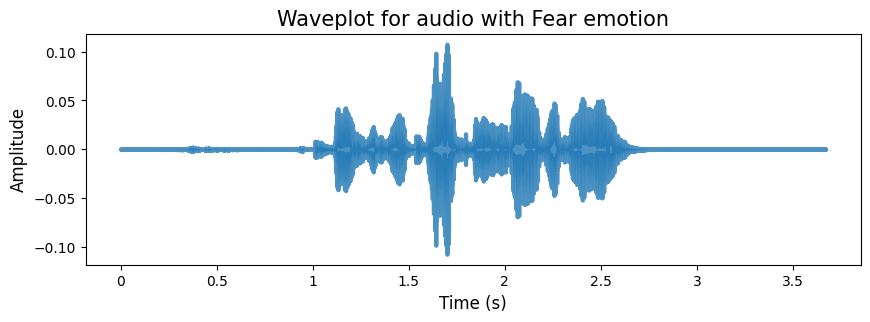

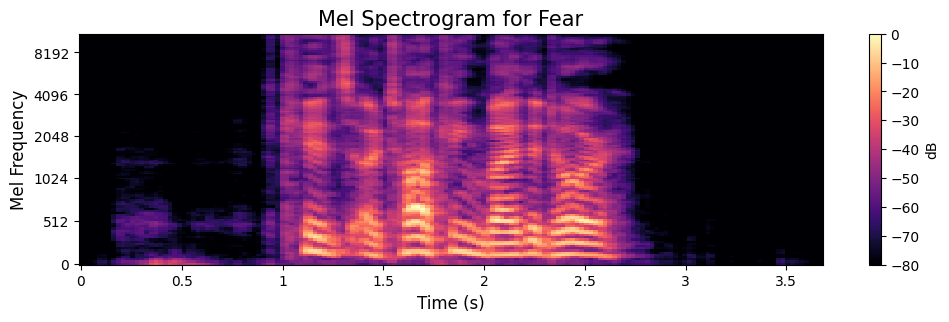

In [ ]:
visualize_emotion("Fear", Ravdess_df)

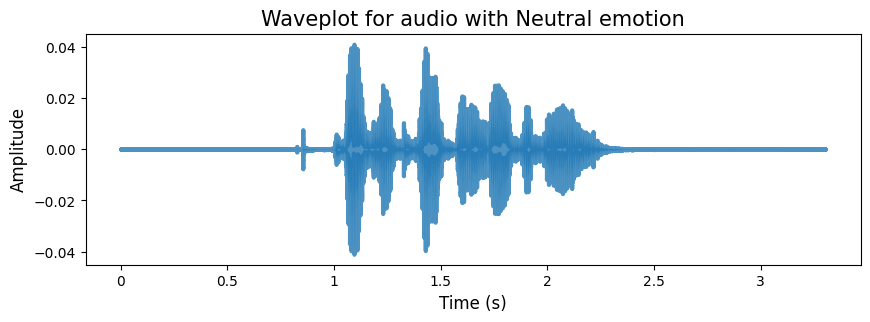

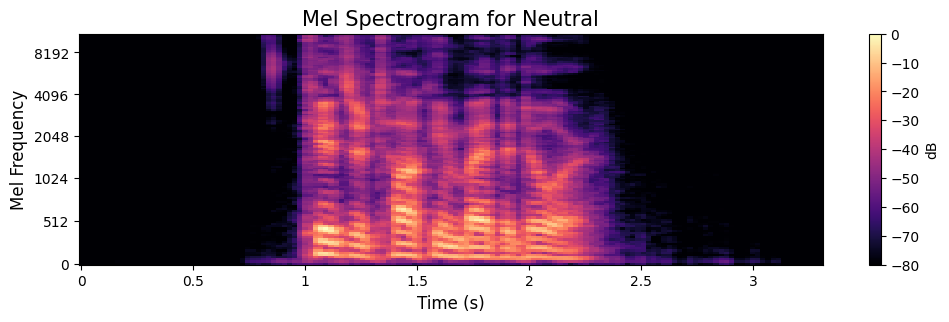

In [ ]:
visualize_emotion("Neutral", Ravdess_df)

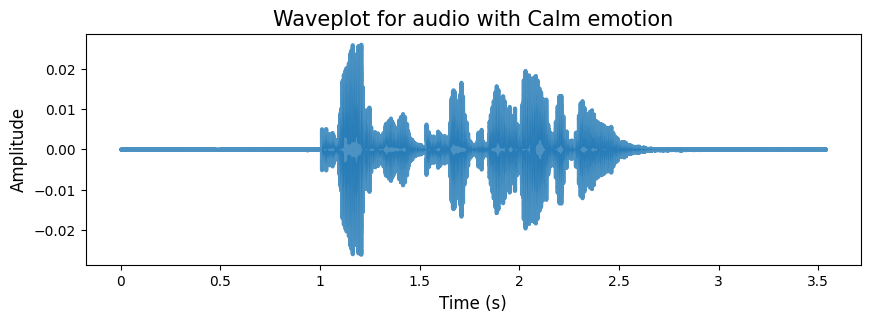

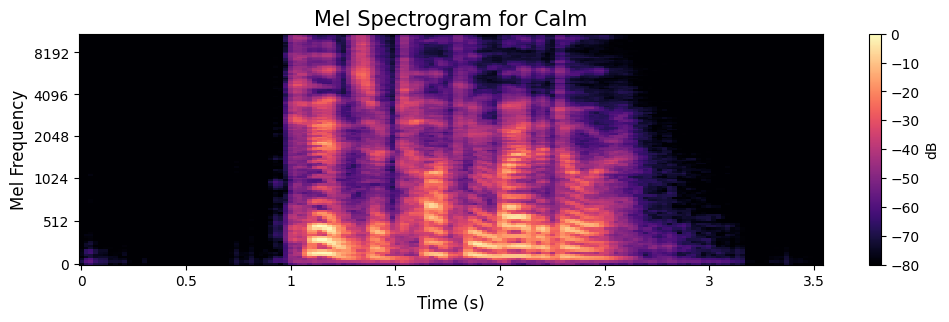

In [ ]:
visualize_emotion("Calm", Ravdess_df)

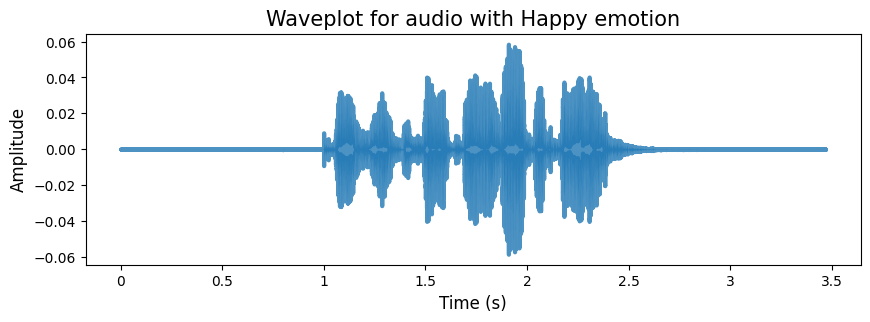

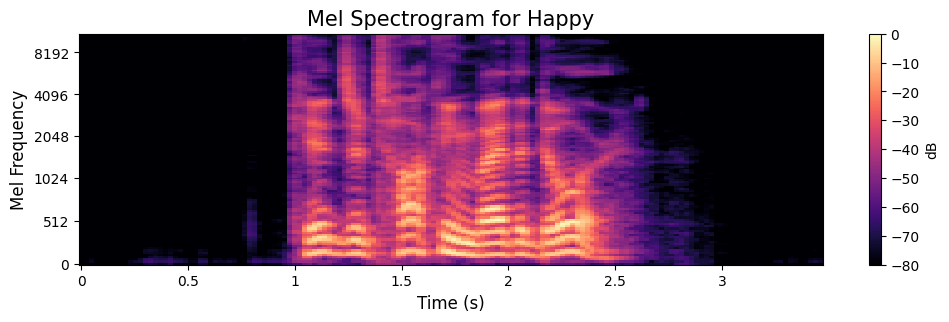

In [ ]:
visualize_emotion("Happy", Ravdess_df)

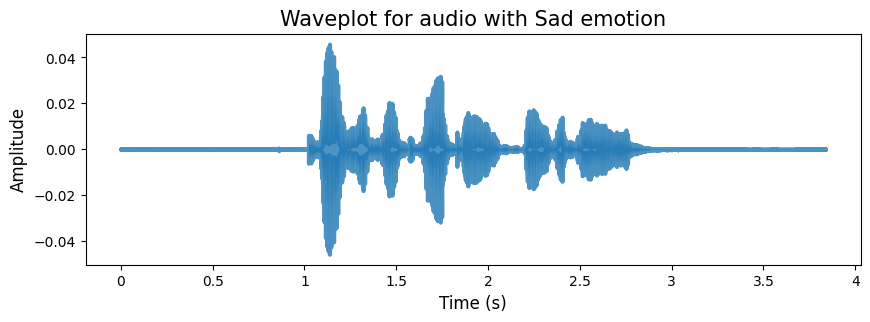

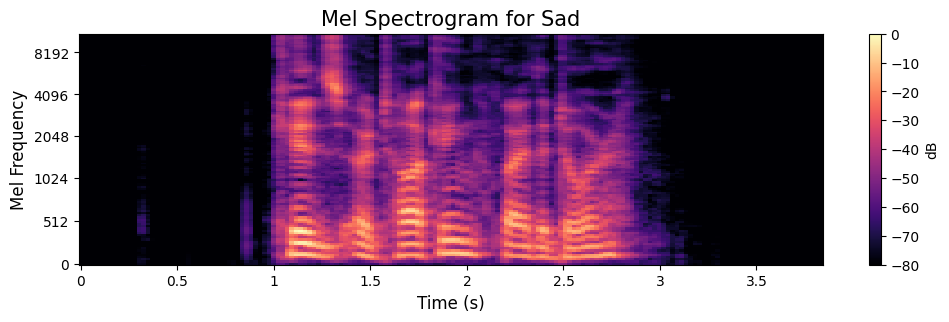

In [ ]:
visualize_emotion("Sad", Ravdess_df)

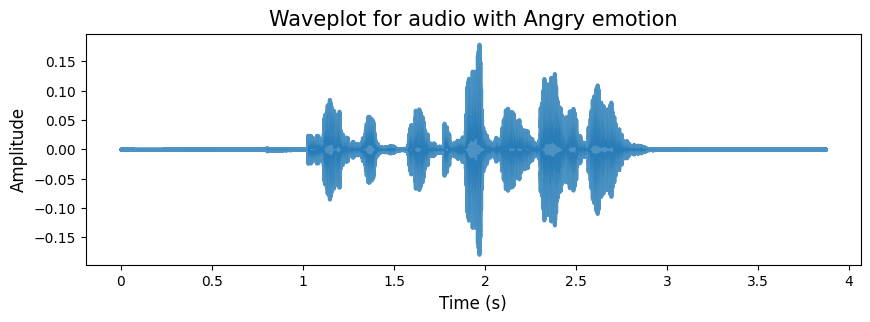

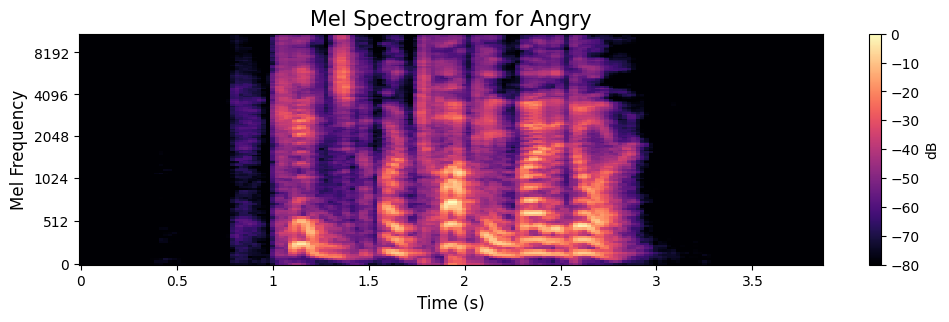

In [ ]:
visualize_emotion("Angry", Ravdess_df)

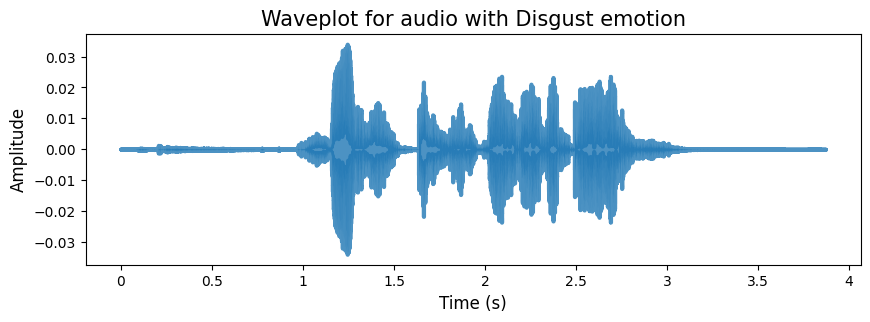

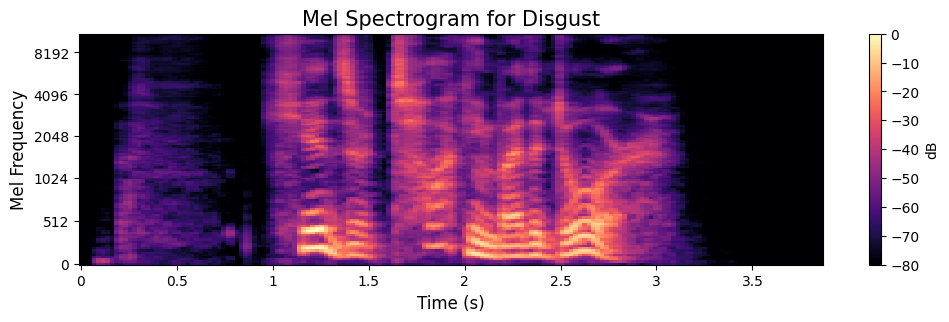

In [ ]:
visualize_emotion("Disgust", Ravdess_df)

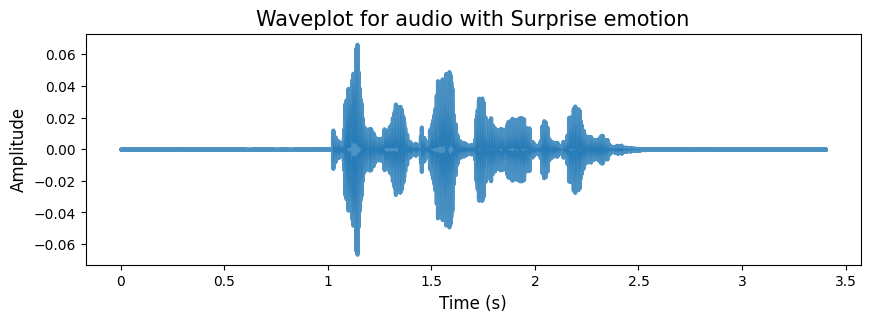

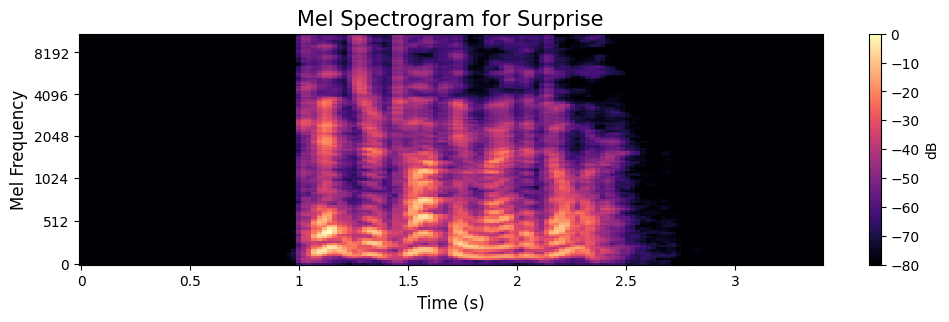

In [ ]:
visualize_emotion("Surprise", Ravdess_df)

In [ ]:
emotion_order = ['Calm', 'Neutral', 'Sad', 'Disgust', 'Fear', 'Happy', 'Surprise', 'Angry']

In [ ]:
def show_all_spectrograms(df):
    emotions = sorted(df.Emotions.unique())  
    fig, axes = plt.subplots(2, 4, figsize=(25, 8))  

    for i, emotion in enumerate(emotion_order):
        ax = axes[i // 4, i % 4] 
        
        path = np.array(df.Path[df.Emotions == emotion])[1] 
        data, sr = librosa.load(path)

        mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sr)
        mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

        img = librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', 
                                       vmin=mel_min, vmax=mel_max, ax=ax)
        
        ax.set_title(emotion, fontsize=12)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Mel Frequency')
        plt.colorbar(img, ax=ax, format="%+2.0f dB")

    plt.suptitle('Mel Spectrograms for 8 Emotions', fontsize=16)
    plt.tight_layout()
    plt.show()


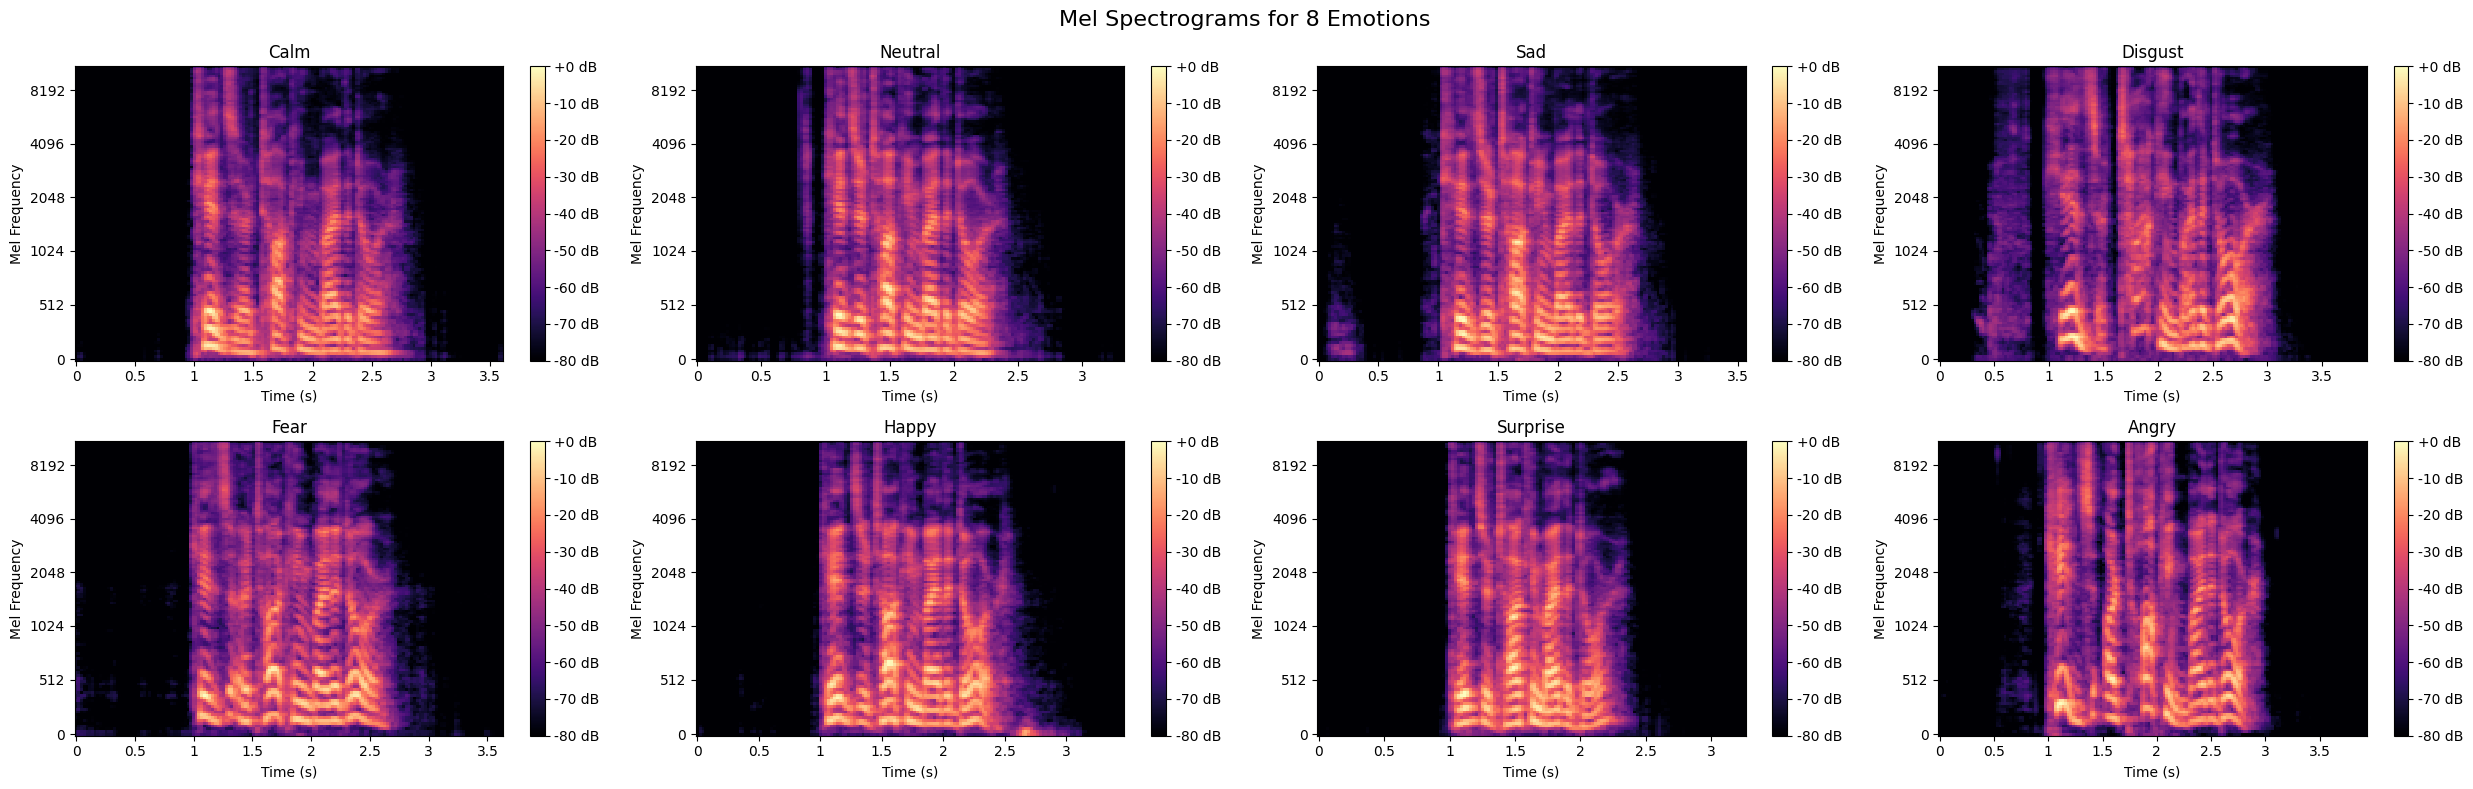

In [ ]:
show_all_spectrograms(Ravdess_df)

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

def show_all_spectrograms(df):
    emotions = sorted(df.Emotions.unique())  
    fig, axes = plt.subplots(len(emotions), 4, figsize=(20, len(emotions) * 3))  

    for i, emotion in enumerate(emotions):
        path = np.array(df.Path[df.Emotions == emotion])[1] 
        data, sr = librosa.load(path)

        # 1️⃣ Mel-Spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sr)
        mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

        # 2️⃣ Zero Crossing Rate (ZCR)
        zcr = librosa.feature.zero_crossing_rate(y=data)[0]

        # 3️⃣ Root Mean Square Energy (RMSE)
        rmse = librosa.feature.rms(y=data)[0]

        # 4️⃣ Mel-Frequency Cepstral Coefficients (MFCC)
        mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)

        # 🖼️ Vẽ đồ thị
        ax1 = axes[i, 0]
        img1 = librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', ax=ax1)
        ax1.set_title(f"Mel Spectrogram - {emotion}")
        plt.colorbar(img1, ax=ax1, format="%+2.0f dB")

        ax2 = axes[i, 1]
        ax2.plot(np.linspace(0, len(data) / sr, len(zcr)), zcr, color='r')
        ax2.set_title(f"Zero Crossing Rate - {emotion}")
        ax2.set_xlabel("Time (s)")

        ax3 = axes[i, 2]
        ax3.plot(np.linspace(0, len(data) / sr, len(rmse)), rmse, color='g')
        ax3.set_title(f"RMSE - {emotion}")
        ax3.set_xlabel("Time (s)")

        ax4 = axes[i, 3]
        img4 = librosa.display.specshow(mfcc, sr=sr, x_axis='time', cmap='coolwarm', ax=ax4)
        ax4.set_title(f"MFCC - {emotion}")
        plt.colorbar(img4, ax=ax4)

    plt.suptitle("Spectrograms & Features for Each Emotion", fontsize=16)
    plt.tight_layout()
    plt.show()


In [ ]:
show_all_spectrograms(Ravdess_df)

NameError: name 'Ravdess_df' is not defined